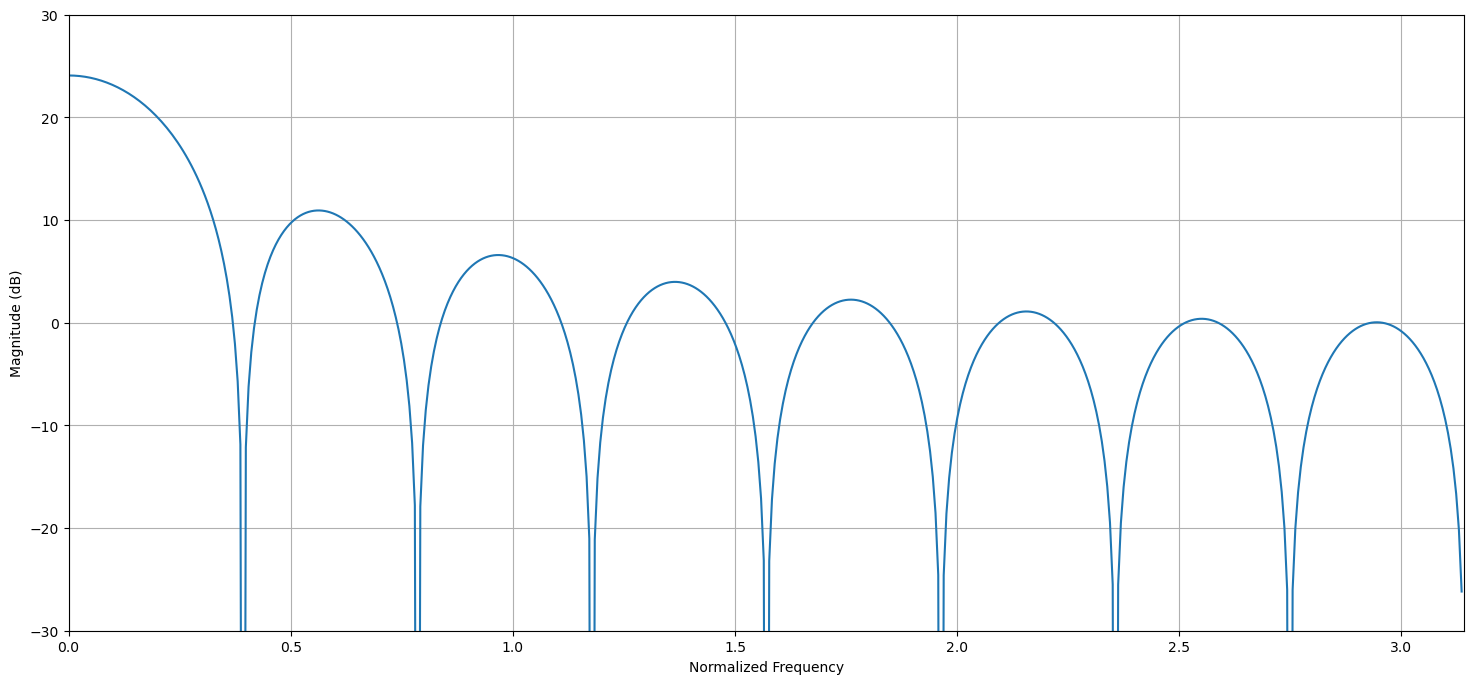

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(18,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

In [4]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

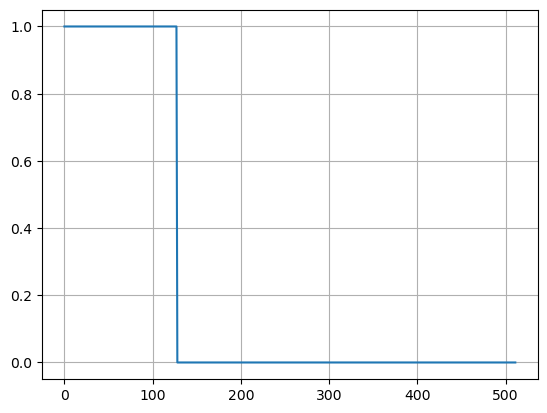

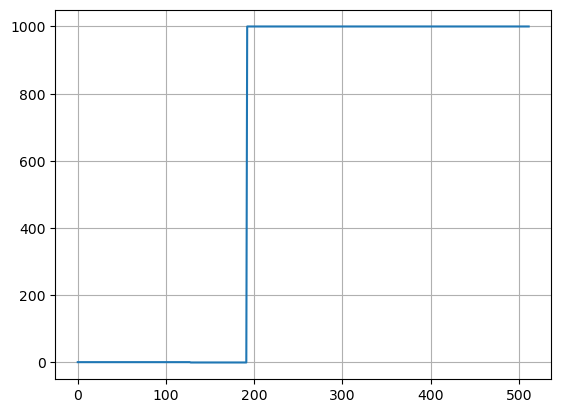

In [5]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

In [6]:
import scipy.optimize as opt

x0=np.random.rand(16) #alternative: e.g. 32
print('x0=', x0)
minout=opt.minimize(errfunc,x0)
h=minout.x
print('h=', h)

x0= [0.31050618 0.46925269 0.63161376 0.78448696 0.51158979 0.82423604
 0.10954652 0.67280922 0.9350402  0.71393639 0.09113286 0.89380115
 0.51507736 0.05637913 0.34099748 0.89994471]
h= [-0.00046852 -0.00211197 -0.00603416 -0.01271562 -0.02185124 -0.03175082
 -0.03987913 -0.04366731 -0.04187469 -0.03511882 -0.02561726 -0.01595162
 -0.00823789 -0.00331557 -0.00094631 -0.0001384 ]


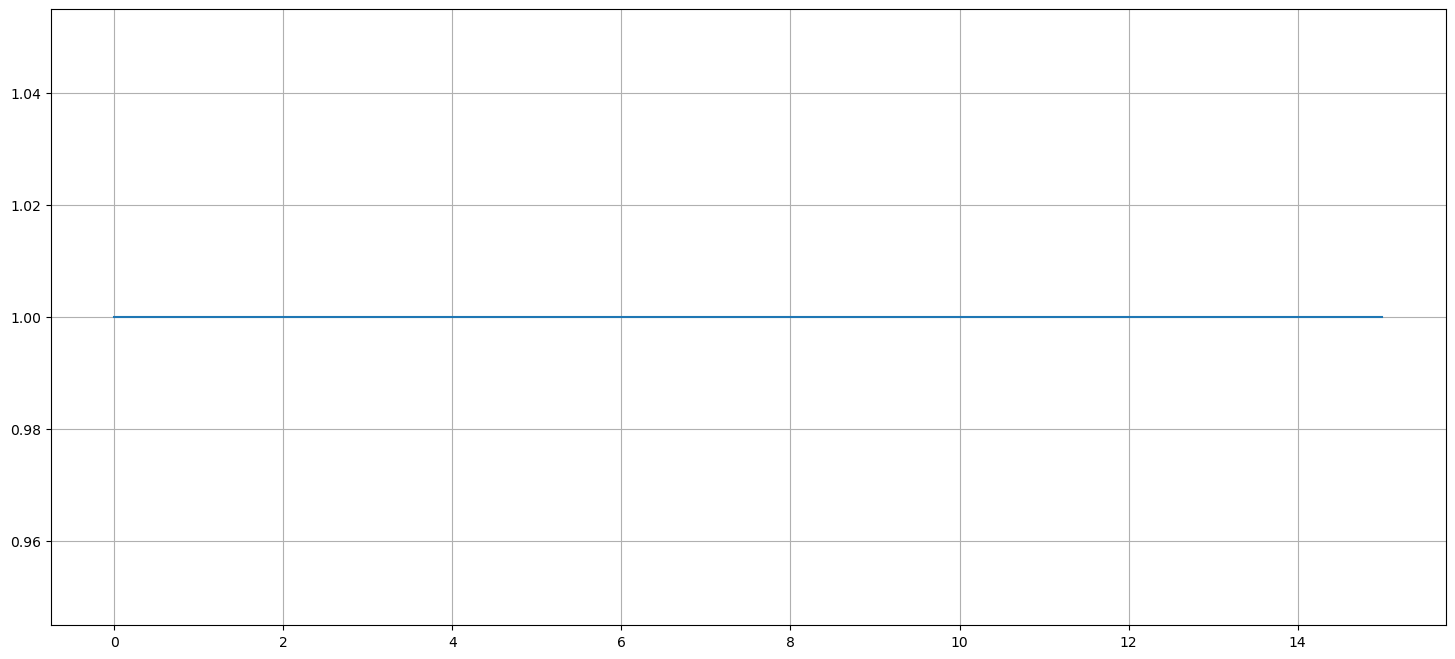

In [24]:
plt.figure(figsize=(18,8))
plt.plot(h)
plt.grid()

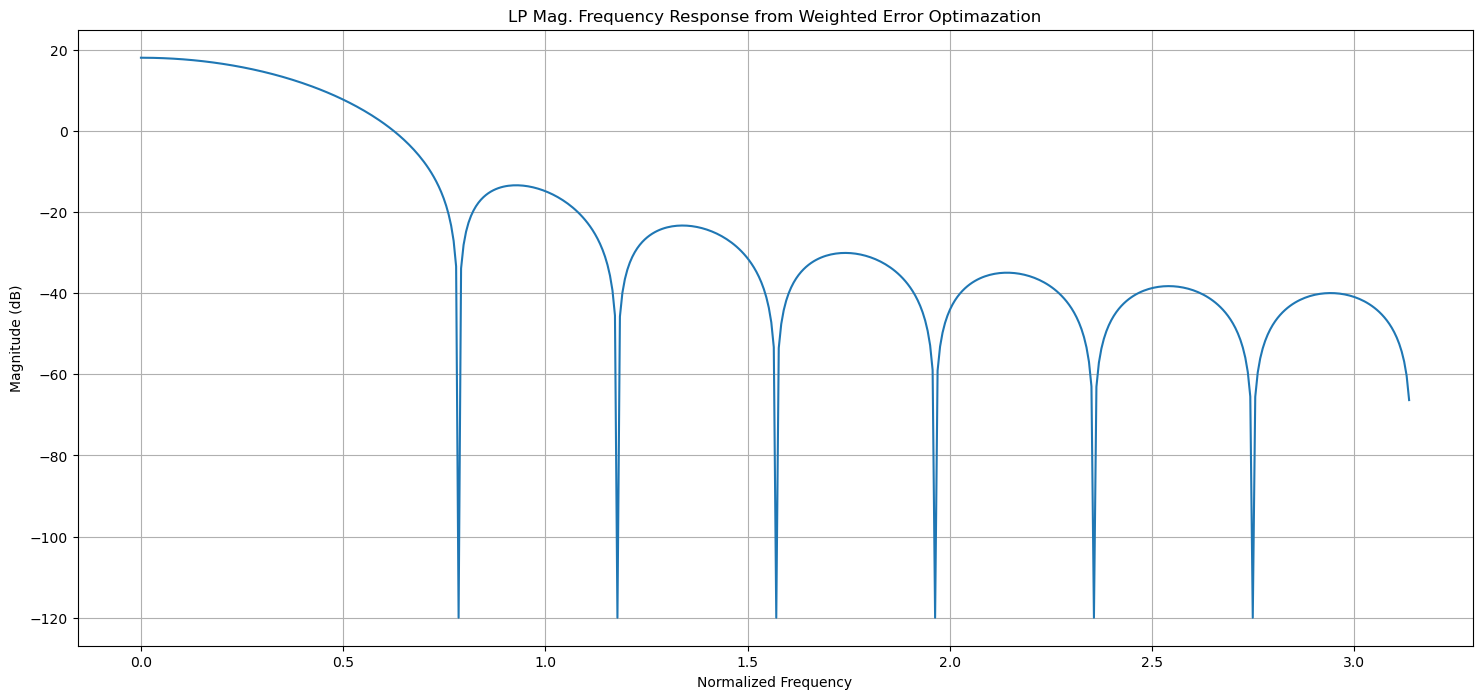

In [18]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

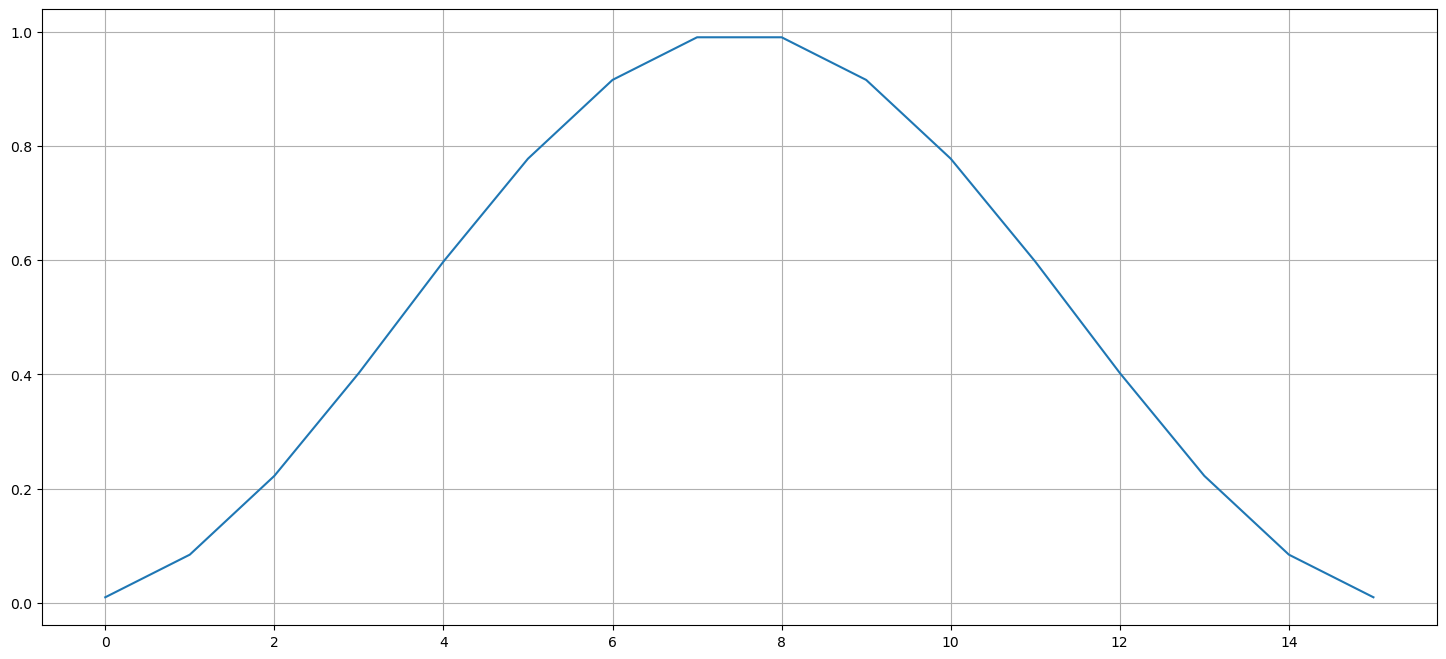

In [17]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(18,8))
plt.plot(h)
plt.grid()

In [10]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

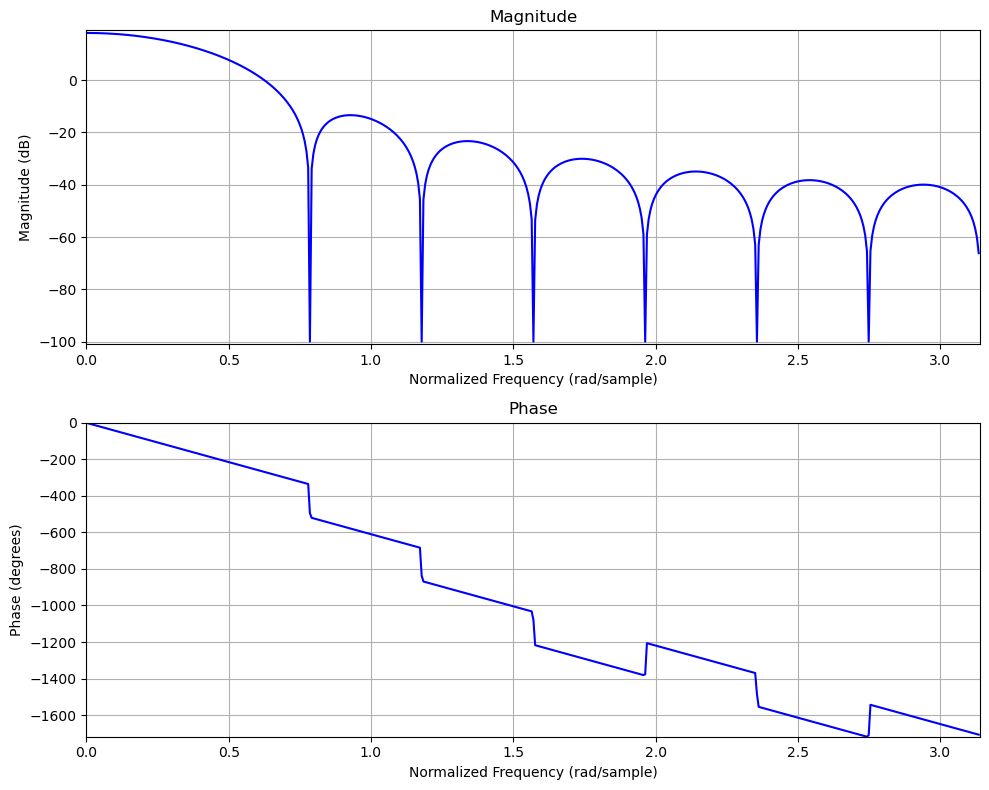

In [11]:
freqz(h)

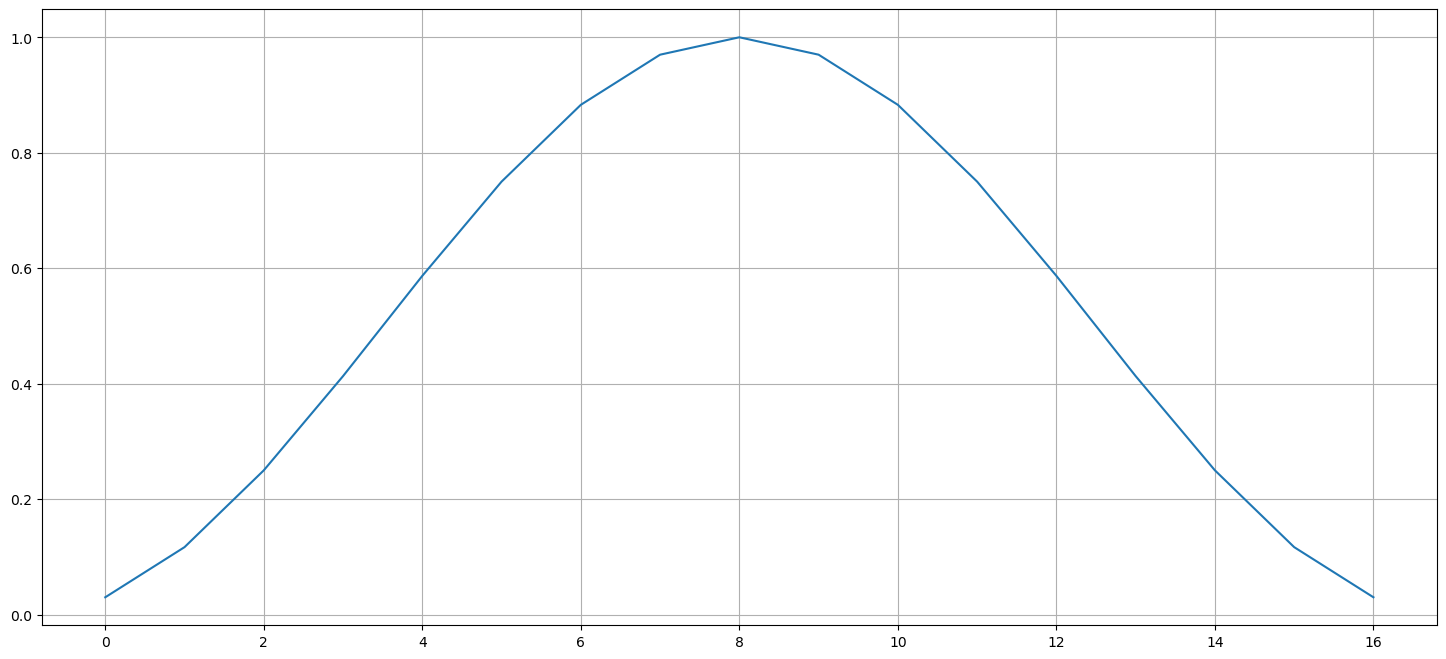

In [16]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(18,8))
plt.plot(h)
plt.grid()

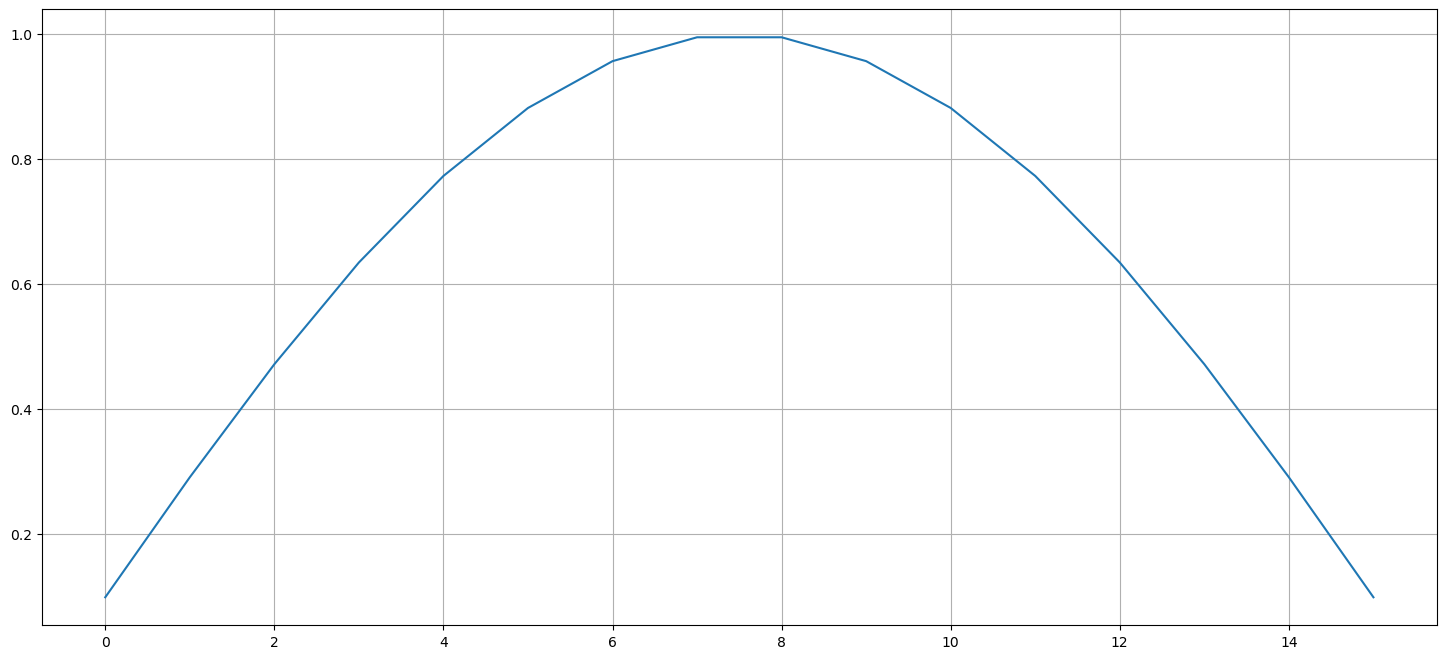

In [15]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(18,8))
plt.plot(s)
plt.grid()

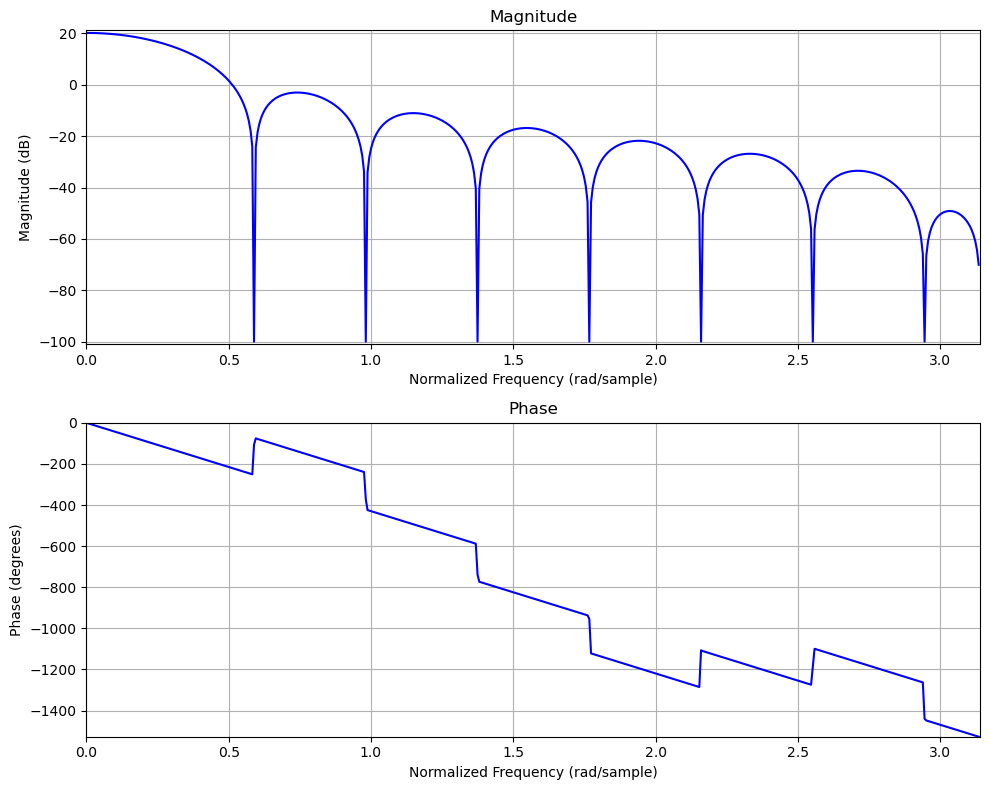

In [14]:
freqz(s)